In [2]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import pandas as pd

In [3]:
def hyst_sigm(points: int, k: float, c: float, shift: float, width: float, hight: float, branch: str):
    x = np.linspace(-4, 4, points)
    if branch == 'up':
        P_plus = np.array([k * x[i] + hight/(1 + np.exp(-c * (x[i] - shift)))  for i in range(points) if x[i] > 0])
        P_minus = np.array([k * x[i] + hight/(1 + np.exp(-c * (x[i] + shift + width))) - hight for i in range(points) if x[i] < 0])
        P_up = np.concatenate((P_minus, P_plus))
        return [x, P_up]
    elif branch == 'bottom':
        P_plus = np.array([k * x[i] + hight/(1 + np.exp(-c * (x[i] - shift - width)))  for i in range(points) if x[i] > 0])
        P_minus = np.array([k * x[i] + hight/(1 + np.exp(-c * (x[i] + shift))) - hight for i in range(points) if x[i] < 0])
        P_bottom = np.concatenate((P_minus, P_plus))
        return [x, P_bottom]

Text(0, 0.5, 'P $[\\mu C/ cm^2]$')

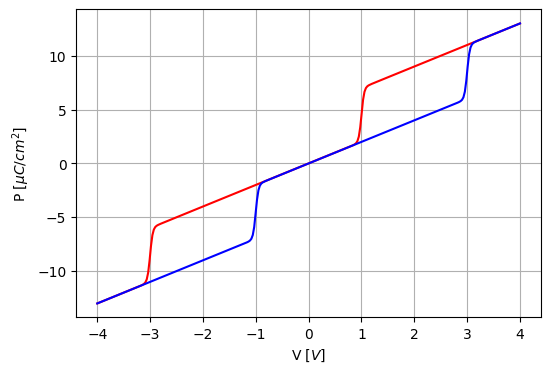

In [4]:
n = 300
V_up, P_up = hyst_sigm(n, 2, 40, 1, 2, 5, 'up')
V_bottom, P_bottom = hyst_sigm(n, 2, 40, 1, 2, 5, 'bottom')

fig, ax = plt.subplots(ncols=1, nrows=1, figsize = [6,4])

ax.plot(V_up, P_up, 'r')
ax.plot(V_bottom, P_bottom, 'b')
ax.grid()
ax.set_xlabel(r'V [$V$]')
ax.set_ylabel(r'P $[\mu C/ cm^2]$')

In [5]:
eps_0 = 8.85 * 10 ** (-12) # dielectric constant
eps_stat = 20 # static permittivity
d_thikness = 10 ** (-8) #dielectric thikness
n = 10 ** (19) # silicon doped concentration
n_i = 1.2 * 10 ** (10) # self concentration 


In [6]:
c_mos = pd.read_excel('mos.xlsx')

In [7]:
data = c_mos[['U','C']][38:90].copy()

In [8]:
data['U'] += 4.83

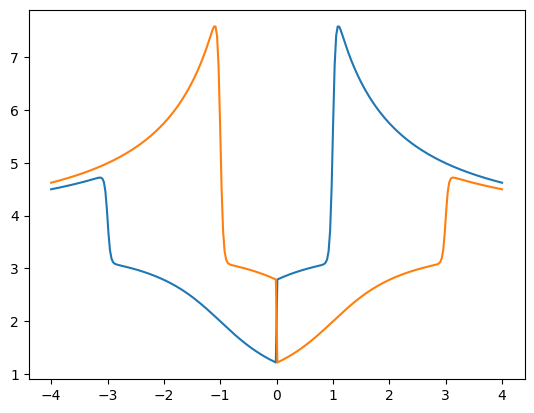

In [15]:
sh = 1
C_up = np.abs(np.arctan(V_up + sh) + np.abs(P_up) / V_up)
C_bottom = np.abs(np.arctan(V_bottom -sh) + np.abs(P_bottom) / V_bottom)
plt.plot(V_up, C_up)
plt.plot(V_bottom, C_bottom)